## Decision Tree Learning

Learned Decision Tree Rules:

|--- Humidity_High <= 0.50
|   |--- class: 1
|--- Humidity_High >  0.50
|   |--- Outlook_Sunny <= 0.50
|   |   |--- Wind_Strong <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind_Strong >  0.50
|   |   |   |--- class: 0
|   |--- Outlook_Sunny >  0.50
|   |   |--- class: 0


Accuracy: 0.60
Training Time: 0.002985 seconds
Prediction Time: 0.001034 seconds


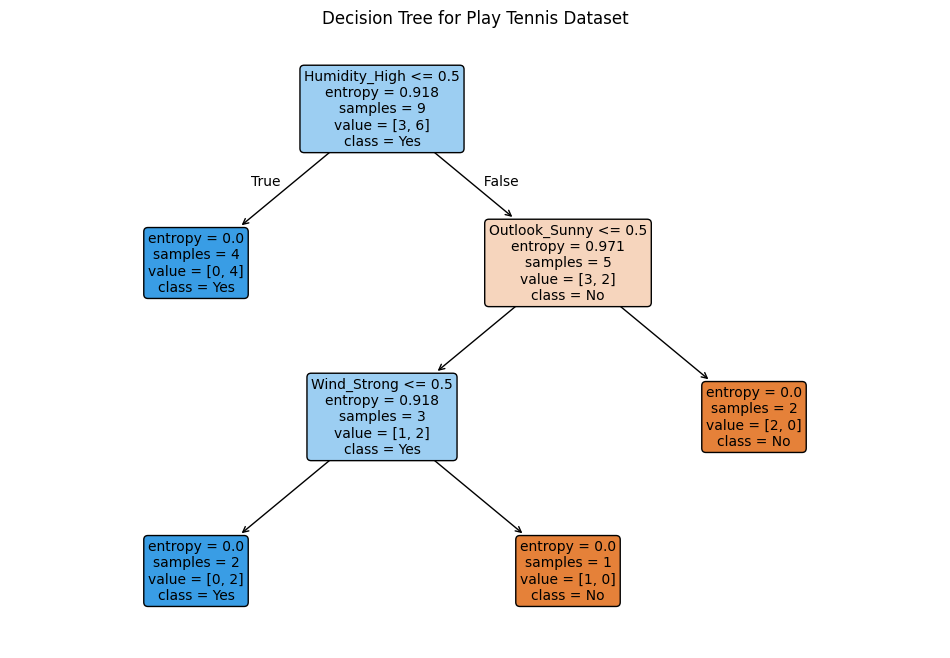

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# 1. Load the dataset from an online Gist (PlayTennis.csv)
url = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/PlayTennis.csv"
data = pd.read_csv(url)

# 2. Preprocess: one-hot encode categorical features, encode target
X = pd.get_dummies(data.drop(columns=['Play Tennis']))
y = data['Play Tennis'].map({'Yes': 1, 'No': 0})

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Train the Decision Tree classifier (using entropy / ID3-style splitting)
start_train = time.time()
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
train_time = time.time() - start_train

# 5. Predict on test set and measure prediction time
start_pred = time.time()
y_pred = clf.predict(X_test)
pred_time = time.time() - start_pred

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# 7. Display decision rules and timing metrics
print("Learned Decision Tree Rules:\n")
print(export_text(clf, feature_names=list(X.columns)))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Training Time: {train_time:.6f} seconds")
print(f"Prediction Time: {pred_time:.6f} seconds")

# 8. Plot the decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Play Tennis Dataset")
plt.show()
